In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, matthews_corrcoef, auc, precision_recall_curve
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

There are many reasons people have to travel. Business, pleasure, experiencing what the world has to offer, getting away from the daily routine of life, and many others. There are also many options when travelling. Where to go, what hotel to stay in, tropical or urban, the list goes on. For this project we want to take a look at that last point. Resort hotels are often great places to stay at for all of their amenities and beach side views and luxurious locations. People often come here to get away from their daily routine for a week and relax and unwind by the beach with a drink in their hand. On the flip side, there are also plenty of city hotels that are upscale, in the city and around the hustle and bustle of daily life. This project will be predicting which hotel a customer chooses based on things like when they will arrive at the hotel, the hotel's rate, how many people in a party, how long they're staying, room types, and many other factors that travellers take into account. Let's have a look.

# Data Cleaning

First thing's first is cleaning up the data set. We need to get rid of all those null values if we're going to have an opportunity to perform predictive modeling on our data. First up is the company column. At only 6797 non-ull values, this column is only filled up about 5% of the total length of our data set, which will make it nearly impossible to find patterns in the data and assign values to fill those missing spots. It'd be best to drop the column entirely and not worry about it.

In [4]:
df['company'].unique()

array([ nan, 110., 113., 270., 178., 240., 154., 144., 307., 268.,  59.,
       204., 312., 318.,  94., 174., 274., 195., 223., 317., 281., 118.,
        53., 286.,  12.,  47., 324., 342., 373., 371., 383.,  86.,  82.,
       218.,  88.,  31., 397., 392., 405., 331., 367.,  20.,  83., 416.,
        51., 395., 102.,  34.,  84., 360., 394., 457., 382., 461., 478.,
       386., 112., 486., 421.,   9., 308., 135., 224., 504., 269., 356.,
       498., 390., 513., 203., 263., 477., 521., 169., 515., 445., 337.,
       251., 428., 292., 388., 130., 250., 355., 254., 543., 531., 528.,
        62., 120.,  42.,  81., 116., 530., 103.,  39.,  16.,  92.,  61.,
       501., 165., 291., 290.,  43., 325., 192., 108., 200., 465., 287.,
       297., 490., 482., 207., 282., 437., 225., 329., 272.,  28.,  77.,
       338.,  72., 246., 319., 146., 159., 380., 323., 511., 407., 278.,
        80., 403., 399.,  14., 137., 343., 346., 347., 349., 289., 351.,
       353.,  54.,  99., 358., 361., 362., 366., 37

In [5]:
del df['company']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Next is the children column. Only four missing values here, so let's take a look at the value counts that make up the column and see if there is a majority.

In [7]:
df['children'].value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

Travellers with 0 kids travelling with them make up the vast majority of this column, we'll fill in the four missing values with 0's and move on to the next column.

In [8]:
df['children'] = df['children'].fillna(0.0)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Next is the country column with about 400 missing values. Let's take a look at the value counts and see where people are from.

In [10]:
df['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
SDN        1
PYF        1
ATF        1
MRT        1
LCA        1
Name: country, Length: 177, dtype: int64

People from Portugal like to travel a lot, apparently. With a pretty wide majority being from Portugal, almost 4 times as many as the next country (Great Britain), adding ~400 more Portugese people would not put the integrity of our data at risk. We'll fill in this column with 'PRT' and move to the final missing column, the travel agent.

In [11]:
df['country'] = df['country'].fillna('PRT')

Finally we have the travel agency that made the booking. Let's again look at the value counts of our column and see if there's a majority.

In [12]:
df['agent'].value_counts()

9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
213.0        1
433.0        1
197.0        1
367.0        1
337.0        1
Name: agent, Length: 333, dtype: int64

With this column having more than 16,000 missing values, it wouldn't make sense to fill those all in with one value and be on our way. Doing so could really skew our data and make our predictions less authentic. First let's take a look at which travel agencies made the most bookings to each type of hotel. Perhaps one agency made most or all of the bookings to one type of hotel.

In [13]:
print(df[df['hotel'] == 'City Hotel'].isnull().sum())

hotel                                0
is_canceled                          0
lead_time                            0
arrival_date_year                    0
arrival_date_month                   0
arrival_date_week_number             0
arrival_date_day_of_month            0
stays_in_weekend_nights              0
stays_in_week_nights                 0
adults                               0
children                             0
babies                               0
meal                                 0
country                              0
market_segment                       0
distribution_channel                 0
is_repeated_guest                    0
previous_cancellations               0
previous_bookings_not_canceled       0
reserved_room_type                   0
assigned_room_type                   0
booking_changes                      0
deposit_type                         0
agent                             8131
days_in_waiting_list                 0
customer_type            

For city hotels about half of our 16,000 data points are missing. Let's see if any one agency made the vast majority of those bookings.

In [14]:
print(df[df['hotel'] == 'City Hotel']['agent'].value_counts())

9.0      31955
1.0       7137
14.0      3640
7.0       3539
6.0       2683
         ...  
265.0        1
247.0        1
213.0        1
289.0        1
306.0        1
Name: agent, Length: 223, dtype: int64


One agency made almost 5 times as many as the rest. Let's take a look at resort hotels and see if the same agency made the bookings.

In [15]:
print(df[df['hotel'] == 'Resort Hotel'].isnull().sum())

hotel                                0
is_canceled                          0
lead_time                            0
arrival_date_year                    0
arrival_date_month                   0
arrival_date_week_number             0
arrival_date_day_of_month            0
stays_in_weekend_nights              0
stays_in_week_nights                 0
adults                               0
children                             0
babies                               0
meal                                 0
country                              0
market_segment                       0
distribution_channel                 0
is_repeated_guest                    0
previous_cancellations               0
previous_bookings_not_canceled       0
reserved_room_type                   0
assigned_room_type                   0
booking_changes                      0
deposit_type                         0
agent                             8209
days_in_waiting_list                 0
customer_type            

In [16]:
print(df[df['hotel'] == 'Resort Hotel']['agent'].value_counts())

240.0    13905
250.0     2869
241.0     1721
40.0      1002
314.0      927
         ...  
159.0        1
355.0        1
367.0        1
476.0        1
303.0        1
Name: agent, Length: 185, dtype: int64


The top agency again made about 5 times as many bookings as the rest. With about 8000 missing values for each type of hotel, filling in those missing values with the top agency for each type of hotel may skew results too much, so it would be best to drop the data points and move on with the rest of the data.

In [17]:
df = df.dropna()
df = df.reset_index().drop('index', axis=1)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103050 entries, 0 to 103049
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           103050 non-null  object 
 1   is_canceled                     103050 non-null  int64  
 2   lead_time                       103050 non-null  int64  
 3   arrival_date_year               103050 non-null  int64  
 4   arrival_date_month              103050 non-null  object 
 5   arrival_date_week_number        103050 non-null  int64  
 6   arrival_date_day_of_month       103050 non-null  int64  
 7   stays_in_weekend_nights         103050 non-null  int64  
 8   stays_in_week_nights            103050 non-null  int64  
 9   adults                          103050 non-null  int64  
 10  children                        103050 non-null  float64
 11  babies                          103050 non-null  int64  
 12  meal            

# Data Visualization

Now that we have a clean data set, let's take a look at the differences between the two types of hotels. As noted below, there are Resort Hotels and City Hotels. The first thing we should take a look at is what months guests arrived most frequently.

In [19]:
df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [20]:
arrival_month_list = ['hotel', 'arrival_date_month']
arrival_df = df[arrival_month_list]
arrival_month_resort = arrival_df[arrival_df['hotel'] == 'Resort Hotel'].groupby('arrival_date_month').count().reset_index()
arrival_month_city = arrival_df[arrival_df['hotel'] == 'City Hotel'].groupby('arrival_date_month').count().reset_index()
arrival_month_resort.columns = ['Arrival Date Month', 'Count']
arrival_month_city.columns = ['Arrival Date Month', 'Count']
arrival_month_resort, arrival_month_city

(   Arrival Date Month  Count
 0               April   2898
 1              August   4359
 2            December   1970
 3            February   2284
 4             January   1465
 5                July   4041
 6                June   2643
 7               March   2406
 8                 May   2881
 9            November   1895
 10            October   2405
 11          September   2604,
    Arrival Date Month  Count
 0               April   6860
 1              August   8323
 2            December   3661
 3            February   4177
 4             January   3098
 5                July   7563
 6                June   7163
 7               March   5743
 8                 May   7208
 9            November   3514
 10            October   7056
 11          September   6833)

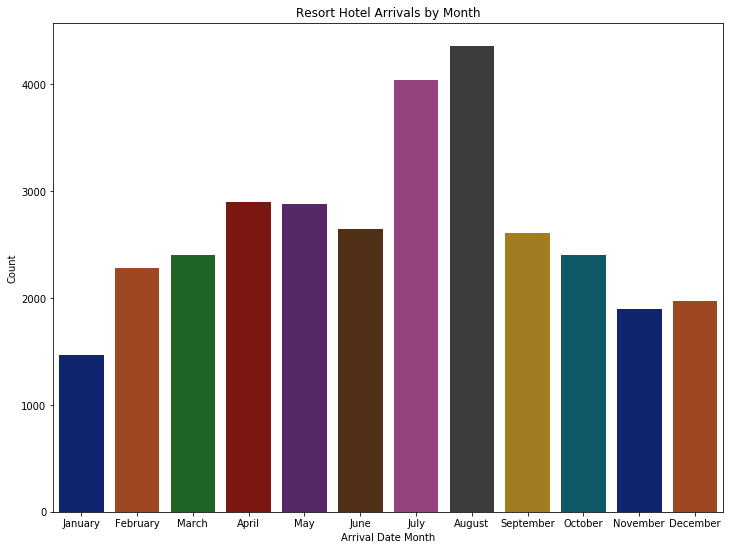

In [21]:
plt.figure(figsize=(12,9))
plt.title('Resort Hotel Arrivals by Month')
plt.ylabel('Count')
sns.barplot(x='Arrival Date Month', y='Count', data=arrival_month_resort, 
            order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 
                   'August', 'September', 'October', 'November', 'December'],
            palette='dark')
plt.show()

Right away we can see that resort hotels really spike during the summer months of July and August; which makes sense. For most of the world, summer is during these months and people want to find a tropical resort to vacation at to get away from their work life.

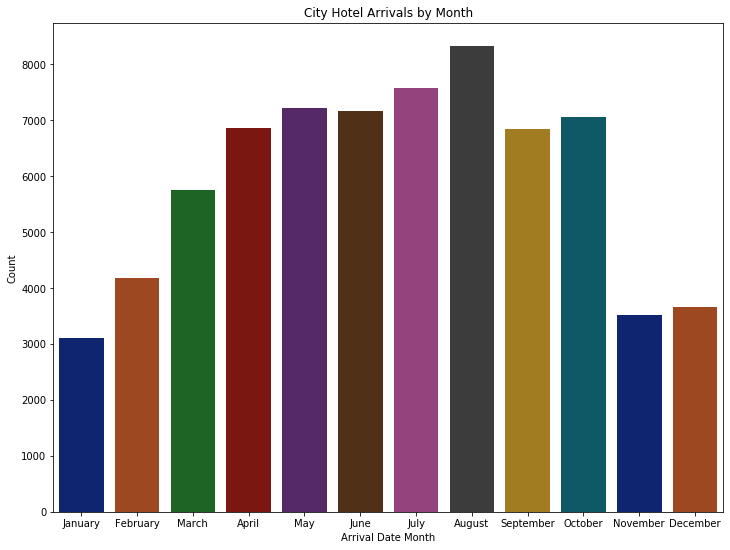

In [22]:
plt.figure(figsize=(12,9))
plt.title('City Hotel Arrivals by Month')
plt.ylabel('Count')
sns.barplot(x='Arrival Date Month', y='Count', data=arrival_month_city, 
            order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 
                   'August', 'September', 'October', 'November', 'December'],
            palette='dark')
plt.show()

For the city hotels, we can see that the numbers have risen significantly, also there isn't as pronounced of a spike during the summer months, it seems to rise and fall more evenly than the resort hotels did. Spring/summer is the busiest time for these hotels, as people are travelling for work and want to do so in a nice enviornment. Late fall and winter isn't very conducive to comfortable travel.

Now what about where in the world these hotels are?

In [23]:
country_df = df[['hotel', 'country']]
country_resort_count = country_df[country_df['hotel'] == 'Resort Hotel'].groupby('country').count().reset_index()
country_resort_count.columns = ['Country', 'Resort Hotel Count']
country_city_count = country_df[country_df['hotel'] == 'City Hotel'].groupby('country').count().reset_index()
country_city_count.columns = ['Country', 'City Hotel Count']

Now that we have the number of city and resort hotels grouped by country, let's take a look at the top 10 in both data frames to see where a lot of these hotels are.

In [24]:
country_resort_count.sort_values('Resort Hotel Count', ascending=False).head(10)

,Country,Resort Hotel Count
93,PRT,12423
44,GBR,5699
39,ESP,3664
54,IRL,2035
43,FRA,1446
32,DEU,1100
23,CN,685
115,USA,427
82,NLD,418
15,BRA,392


In [25]:
country_city_count.sort_values('City Hotel Count', ascending=False).head(10)

,Country,City Hotel Count
125,PRT,25324
50,FRA,8364
39,DEU,5898
53,GBR,5190
46,ESP,4184
75,ITA,3178
14,BEL,1793
23,BRA,1694
157,USA,1543
115,NLD,1541


Portugal (PRT) takes the top spot for both city and resort hotels. This makes sense, Portugal is a beautiful country with a long coast along the Atlantic ocean, with tons of cities dotting the coast. Lots of places for resorts to pop up, as well as inner city hotels.

Looking at the resort list, Great Britain (GBR) having the second most resorts stands to reason. Being an island entirely surrounded by water, there are lots of places for resorts to pop up. It also as an about even number of city hotels, with London, Birmingham, and Manchester, there are plenty of people to check into these hotels.

It's interesting to see Italy (ITA) on the top 10 of city hotels, but not on the resort hotels. I would have expected Italy to have more resorts considering it juts out into the Mediterranean sea and has lots of sea front area. It could be a geography thing, maybe not many beaches that are good to build resorts on. 

So which kind of hotel is more expensive? We can take a look at the Average Daily Rate (ADR) of each type of hotel to determine which one, on average, is more expensive.

In [26]:
print(df[df['hotel'] == 'Resort Hotel']['adr'].mean())

99.93200150701719


In [27]:
print(df[df['hotel'] == 'City Hotel']['adr'].mean())

106.71545920588414


Seems like city hotels are a bit pricier on average than resort hotels. Taking a look at the average doesn't tell us a whole lot though, let's see the distribution of the ADR to get a better idea on the spread of values between the two types of hotels.

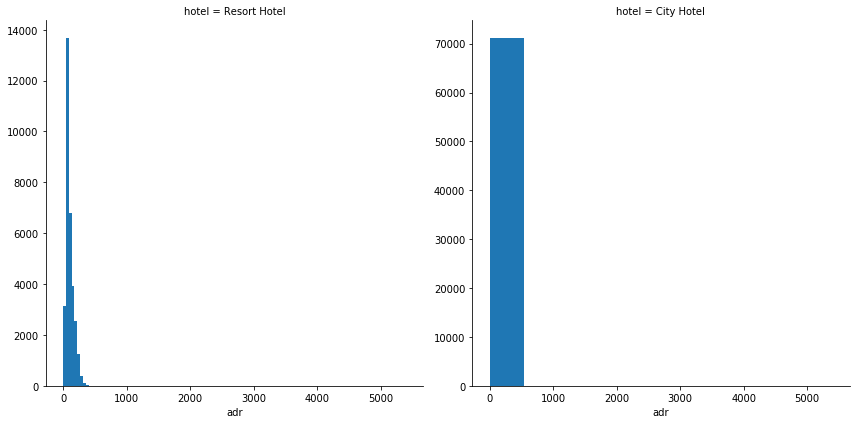

In [28]:
s = sns.FacetGrid(df, col='hotel', height=6, sharey=False)
s = s.map(plt.hist, 'adr')

Seems odd that the x-axis goes all the way up to 5000+, let's see if we can find ADR values of greater than 1000 to find those outliers.

In [29]:
df[df['adr'] >= 1000]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
39728,City Hotel,1,35,2016,March,13,25,0,1,2,...,1,Non Refund,12.0,0,Transient,5400.0,0,0,Canceled,2016-02-19


Just one. A canceled reservation with a rate of 5400 (!!!). We can drop that one without concern to see the distribution of hotel ADR's better.

In [30]:
df.drop(df[df['adr'] >= 1000].index, inplace=True)

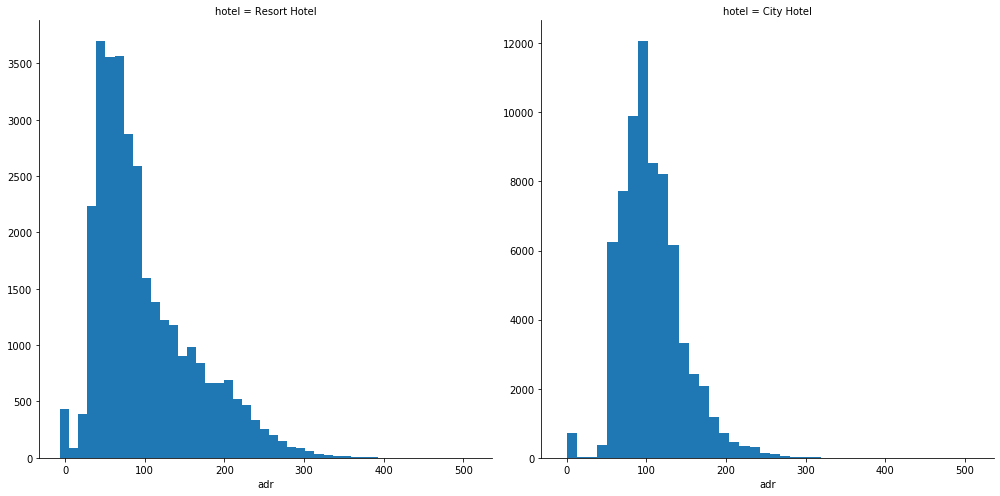

In [31]:
s = sns.FacetGrid(df, col='hotel', height=7, sharey=False)
s = s.map(plt.hist, 'adr', bins=40)

Here we can see that the city hotel rates are just a little bit more skewed to the right than the resort hotel rates, leading to their ADR's to be generally higher. Also, resort hotel ADR's have a larger spread compared to the city hotel ADR's. Which means that the resort hotel rates will probably have a higher standard deviation than the city hotel rates.

In [32]:
print(f'Resort Hotel ADR Standard Deviation: {df[df.hotel == "Resort Hotel"].adr.std()}')
print(f'City Hotel ADR Standard Deviation:   {df[df.hotel == "City Hotel"].adr.std()}')

Resort Hotel ADR Standard Deviation: 62.16701127061136
City Hotel ADR Standard Deviation:   38.55873590274058


Yes. As seen above, the resort hotels have a larger standard deviation, which means their prices will be more varied than the city hotels. This could be for any number of reasons, including location differences between the resorts.

Another interesting thing to look at would be repeated guests between city and resort hotels. Maybe people have a high loyalty to a type of hotel, more so one than the other? Let's take a look.

In [33]:
df['is_repeated_guest'].value_counts()

0    101604
1      1445
Name: is_repeated_guest, dtype: int64

Wow. Only 1,400 repeat guests compared to ~102,000 non-repeats. Maybe we can take a look at how many more repeat guests there were at resort hotels compared to city hotels.

In [34]:
repeat_df = df[['hotel', 'is_repeated_guest']]
repeat_df = repeat_df[repeat_df['is_repeated_guest'] == 1]
repeat_hotel_count = repeat_df.groupby('hotel').count()
repeat_hotel_count

,is_repeated_guest
hotel,
City Hotel,717
Resort Hotel,728


About an even split. The hotel type apparently doesn't matter on bringing people back for a second stay at a specific hotel.

Last thing for looking at the splits between the two hotels is the number of cancellations between the two. Maybe there's a discernable pattern here that we can find on which type of hotel is more likely to have canceled bookings.

In [35]:
cancel_df = df[['hotel', 'is_canceled']]
cancel_df = cancel_df[cancel_df['is_canceled'] == 1]
cancel_hotel_count = cancel_df.groupby('hotel').count()
cancel_hotel_count

,is_canceled
hotel,
City Hotel,30492
Resort Hotel,9701


Interesting. Lots of canceled bookings for city hotels. Let's see those numbers as a percentage of the totals from our original data set to see which is a more significant loss.

In [36]:
cancel_dict = {'City Hotel': round(cancel_hotel_count['is_canceled'][0] / df[df['hotel'] == 'City Hotel'].count()[0] * 100, 2),
               'Resort Hotel': round(cancel_hotel_count['is_canceled'][1] / df[df['hotel'] == 'Resort Hotel'].count()[0] * 100, 2)}
cancel_dict

{'City Hotel': 42.83, 'Resort Hotel': 30.46}

In [37]:
cancel_hotel_perc = pd.DataFrame(cancel_dict, index=['is_canceled_perc'])
cancel_hotel_perc = cancel_hotel_perc.transpose()
cancel_hotel_perc.index.name = 'hotel'
cancel_hotel_perc

,is_canceled_perc
hotel,
City Hotel,42.83
Resort Hotel,30.46


So city hotels being canceled as often as they are is still taking a larger percentage out of the total bookings, though the resort hotel cancelations are also taking a large part out of the total bookings for this hotel type. Very interesting.

# Predictive Modeling

Here we'll get into some predictive modeling on what kind of hotel a person is staying at based upon the factors seen above, as well as all the ones we didn't get into. First we need to make the modeling data set out of the columns we have. Let's take a look.

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103049 entries, 0 to 103049
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           103049 non-null  object 
 1   is_canceled                     103049 non-null  int64  
 2   lead_time                       103049 non-null  int64  
 3   arrival_date_year               103049 non-null  int64  
 4   arrival_date_month              103049 non-null  object 
 5   arrival_date_week_number        103049 non-null  int64  
 6   arrival_date_day_of_month       103049 non-null  int64  
 7   stays_in_weekend_nights         103049 non-null  int64  
 8   stays_in_week_nights            103049 non-null  int64  
 9   adults                          103049 non-null  int64  
 10  children                        103049 non-null  float64
 11  babies                          103049 non-null  int64  
 12  meal            

Right away we can drop reservation status and reservation status date, those aren't important in determining the hotel type and would only serve as noise in the data set.

In [39]:
modeling_df = df.drop(['reservation_status', 'reservation_status_date'], axis=1)

For most of the rest of the columns, we can use dummy variables for them, and end up with a data set that's not too large for our modeling. Let's get some dummy variables in our data set and see how many columns our data set has.

In [40]:
modeling_df = pd.get_dummies(modeling_df, columns=['arrival_date_month', 'meal', 'country', 'market_segment',
                                                   'distribution_channel', 'reserved_room_type', 'assigned_room_type',
                                                   'deposit_type', 'customer_type', 'agent'])

In [41]:
modeling_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103049 entries, 0 to 103049
Columns: 580 entries, hotel to agent_535.0
dtypes: float64(2), int64(16), object(1), uint8(561)
memory usage: 70.9+ MB


580 columns. That's a lot. Though most of those are all the different countries that people are from as well as all the different travel agencies. Before we get into some modeling, let's see what kind of clasification problem we have here.

In [42]:
modeling_df['hotel'].value_counts()

City Hotel      71198
Resort Hotel    31851
Name: hotel, dtype: int64

An imbalanced classification problem, at about 2:1 majority class to minority class. This could mean we will need to do some resampling in the future to perhaps achieve some better results. Let's start off with a base logistic regression model to get a good baseline on our predictive power.

In [43]:
X = modeling_df.drop('hotel', axis=1)
y = modeling_df['hotel']
y = y.map(lambda x: 1 if x == 'City Hotel' else 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=11)

In [44]:
logit = LogisticRegression(max_iter=10000, random_state=11)
logit.fit(X_train, y_train)
logit.score(X_train, y_train), logit.score(X_test, y_test)

(0.9907357089252905, 0.989791561541746)

Really good scores right off the bat, let's see what the coefficients look like and if there are any variables really taking over.

In [45]:
coef_df = pd.DataFrame(logit.coef_, columns=X.columns, index=['Coefficient']).transpose().sort_values('Coefficient', ascending=False)
coef_df.head(10)

,Coefficient
agent_14.0,7.653053
agent_28.0,6.402232
agent_9.0,6.208922
agent_37.0,5.332700
agent_22.0,5.219087
agent_7.0,5.116588
meal_SC,5.065436
agent_1.0,5.041418
agent_27.0,4.933631
agent_83.0,4.924417


In [46]:
coef_df.tail(10)

,Coefficient
agent_184.0,-4.096560
agent_208.0,-4.469490
agent_96.0,-4.958711
agent_251.0,-5.172665
agent_298.0,-5.293739
agent_250.0,-5.554388
agent_314.0,-5.756469
agent_242.0,-7.254937
agent_241.0,-7.281784
agent_240.0,-8.812229


So we're seeing some leaking here. The model is almost exclusively using the different agent variables to make its predictions. That poses a problem for getting truly accurate predictions for customers and their hotel bookings. We'll re-initialize our original data frame, take out the agent variable so we get the values we dropped back, then continue with our modeling and see how the new model does.

In [47]:
df = pd.read_csv('hotel_bookings.csv')
df = df.drop(['company', 'agent'], axis=1)
df['children'] = df['children'].fillna(0.0)
df['country'] = df['country'].fillna('PRT')
df.drop(df[df['adr'] >= 1000].index, inplace=True)

So we've dropped the columns we needed to and filled our NaN values again, now we'll initialize our modeling data frame again.

In [48]:
modeling_df = df.drop(['reservation_status', 'reservation_status_date'], axis=1)
modeling_df = pd.get_dummies(modeling_df, columns=['arrival_date_month', 'meal', 'country', 'market_segment',
                                                   'distribution_channel', 'reserved_room_type', 'assigned_room_type',
                                                   'deposit_type', 'customer_type'])
modeling_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119389 entries, 0 to 119389
Columns: 255 entries, hotel to customer_type_Transient-Party
dtypes: float64(2), int64(16), object(1), uint8(236)
memory usage: 45.1+ MB


Let's once again take a look at the distribution of our target variable and see how much it's changed.

In [49]:
print(modeling_df['hotel'].value_counts())

City Hotel      79329
Resort Hotel    40060
Name: hotel, dtype: int64


Still a 2:1 ratio here.

In [50]:
X = modeling_df.drop('hotel', axis=1)
y = modeling_df['hotel']
y = y.map(lambda x: 1 if x == 'City Hotel' else 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=11)

In [51]:
logit = LogisticRegression(max_iter=10000, random_state=11)
logit.fit(X_train, y_train)
logit.score(X_train, y_train), logit.score(X_test, y_test)

(0.8477457254218738, 0.848968105065666)

So not as great a score as our previous model, but still a good model nonetheless. No overfitting that we see, let's again take a look at our coefficients and see what's important in our predictions. 

In [52]:
coef_df = pd.DataFrame(logit.coef_, columns=X.columns, index=['Coefficient']).transpose().sort_values('Coefficient', ascending=False)
coef_df.head(10)

,Coefficient
meal_SC,6.722989
market_segment_Complementary,4.154185
assigned_room_type_K,3.377120
reserved_room_type_B,3.285495
country_AGO,2.587966
assigned_room_type_B,2.507374
meal_BB,2.142216
market_segment_Aviation,2.059309
assigned_room_type_A,1.758358
deposit_type_Non Refund,1.523658


In [53]:
coef_df.tail(10)

,Coefficient
country_IRL,-1.908075
assigned_room_type_C,-1.976060
country_CN,-2.085105
reserved_room_type_C,-2.117451
market_segment_Online TA,-2.451771
assigned_room_type_I,-2.467629
reserved_room_type_H,-2.843428
assigned_room_type_H,-3.300186
meal_FB,-3.827635
meal_Undefined,-5.164604


Some interesting results here. Meal types seem to be very important both ways. Assigned room type also seems to be pretty important in determining which hotel the model predicts. Let's make some predictions then take a look at some other metrics to see how our model is doing.

In [54]:
pred = logit.predict(X_test)

Base Logistic Regression Test Accuracy: 84.9%
Base Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.81      0.71      0.76     10015
           1       0.86      0.92      0.89     19833

    accuracy                           0.85     29848
   macro avg       0.84      0.82      0.82     29848
weighted avg       0.85      0.85      0.85     29848



Base Logistic Regression MCC Score: 0.6535218340402097


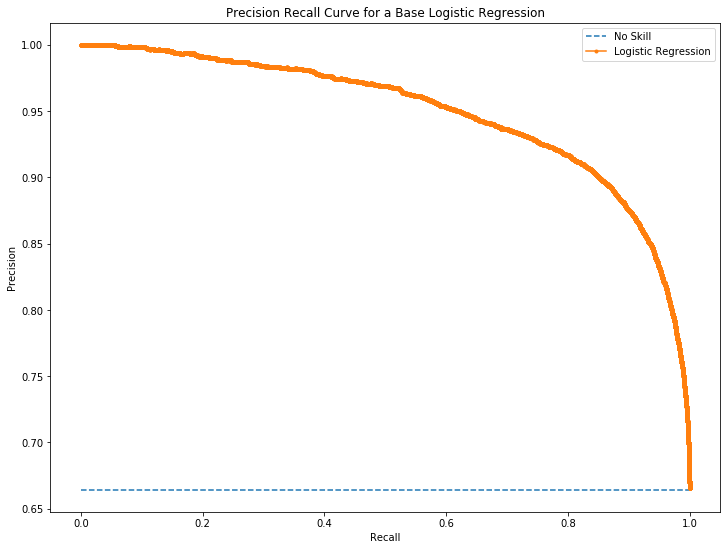

Base Logistic Regression AUC Score: 0.9487480872763728


In [55]:
print(f'Base Logistic Regression Test Accuracy: {round(accuracy_score(y_test, pred) * 100, 2)}%')
print(f'Base Logistic Regression Classification Report')
print(classification_report(y_test, pred))
print('\n')
print(f'Base Logistic Regression MCC Score: {matthews_corrcoef(y_test, pred)}')

probs = logit.predict_proba(X_test)
probs = probs[:, 1]

logit_precision, logit_recall, _ = precision_recall_curve(y_test, probs)

no_skill = len(y_test[y_test == 1]) / len(y_test)
plt.figure(figsize=(12,9))
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(logit_recall, logit_precision, marker='.', label='Logistic Regression')
plt.title('Precision Recall Curve for a Base Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

print(f'Base Logistic Regression AUC Score: {auc(logit_recall, logit_precision)}')

We've built a pretty solid model overall. Test accuracy is good at ~85%, with no signs of overfitting. A good Matthews Correlation Coefficient at 0.650, which means the correlation between what our model predicted and what the actual labels is good but certainly could be better. Looking at the P/R curve, our precision doesn't really start falling off until a recall of about 0.8, which is not bad. Also the AUC score based on our P/R curve being 0.948 is great. Overall it seems pretty easy to predict whether a person will book at a city or resort hotel.

Going a little bit deeper, what if we were to tune the C value of our logistic regression model, as well as scale our data to make our coefficients more interpretable? We'll use a pipeline with GridSearchCV to do this, and test a range of different C values to find our best model.

In [56]:
steps = [('scaler', StandardScaler()), 
         ('logit', LogisticRegression(random_state=11, max_iter=10000))]
param_grid = {'logit__C': [.001, .01, .1, .25, .5, 1, 5, 10, 50, 100]}
pipeline = Pipeline(steps)
cv = GridSearchCV(pipeline, param_grid, cv=5)
cv.fit(X_train, y_train)
print(cv.best_params_, cv.best_score_)
C = cv.best_params_['logit__C']

{'logit__C': 50} 0.8510961878565266


Now that we have our best C value, let's scale our data, then split, fit, and predict again.

In [57]:
X = modeling_df.drop('hotel', axis=1)
X = StandardScaler().fit_transform(X)
y = modeling_df['hotel']
y = y.map(lambda x: 1 if x == 'City Hotel' else 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=11)

In [58]:
logit = LogisticRegression(C=C, random_state=11, max_iter=10000)
logit.fit(X_train, y_train)
logit.score(X_train, y_train), logit.score(X_test, y_test)

(0.851967255223864, 0.8522179040471723)

Finding the best C value for our logistic regression helpped some. Not a whole lot, only seeing a ~.002 increase in score, which isn't much realistically. Let's take a look at our top 10 coefficients again and see if those changed under the scaled values.

In [59]:
coef_df = pd.DataFrame(logit.coef_, columns=modeling_df.drop('hotel', axis=1).columns, index=['Coefficient']).transpose().sort_values('Coefficient', ascending=False)
coef_df.head(10)

,Coefficient
meal_SC,1.928713
assigned_room_type_K,1.731779
arrival_date_week_number,1.292970
adr,1.248315
market_segment_Aviation,0.983201
distribution_channel_GDS,0.888491
arrival_date_month_January,0.649491
arrival_date_month_February,0.608375
arrival_date_month_March,0.604598
assigned_room_type_A,0.501533


In [60]:
coef_df.tail(10)

,Coefficient
meal_FB,-0.430388
market_segment_Online TA,-0.452526
arrival_date_month_August,-0.455344
arrival_date_month_December,-0.483222
stays_in_week_nights,-0.569962
meal_HB,-0.740861
reserved_room_type_H,-0.781756
assigned_room_type_H,-1.259998
assigned_room_type_I,-1.864897
meal_Undefined,-2.412883


Interesting results here. Our top variables stayed the same, meal SC and meal undefined are still the variables with the most impact on our predictions either way, but here we see arrival months becoming important. January/February/March are good months for City hotels, while August and December are apparently good for Resort hotels. After scaling our variables, we also notice the Average Daily Rate become important for predicting City Hotels, just like we saw during our EDA.

Finally let's make predictions and see some metrics for how our tuned logistic regression model is doing.

In [61]:
pred = logit.predict(X_test)

Tuned Logistic Regression Test Accuracy: 85.22%
Tuned Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.81      0.72      0.77     10015
           1       0.87      0.92      0.89     19833

    accuracy                           0.85     29848
   macro avg       0.84      0.82      0.83     29848
weighted avg       0.85      0.85      0.85     29848



Tuned Logistic Regression MCC Score: 0.6616614637978697


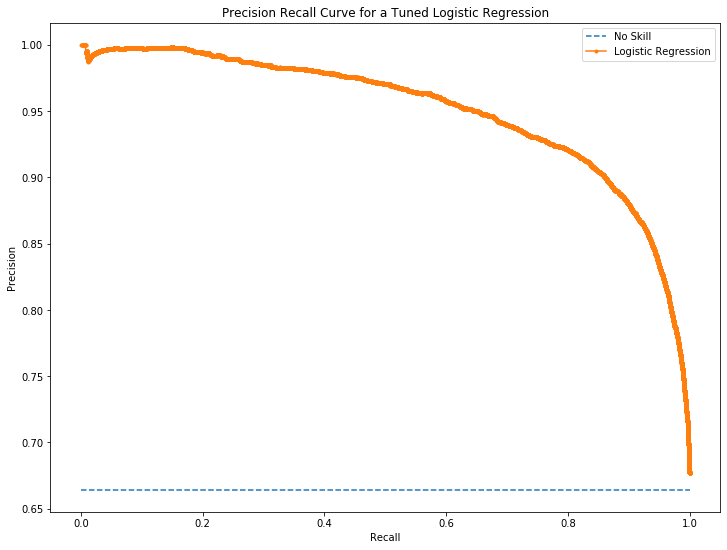

Base Logistic Regression AUC Score: 0.9507195330738296


In [62]:
print(f'Tuned Logistic Regression Test Accuracy: {round(accuracy_score(y_test, pred) * 100, 2)}%')
print(f'Tuned Logistic Regression Classification Report')
print(classification_report(y_test, pred))
print('\n')
print(f'Tuned Logistic Regression MCC Score: {matthews_corrcoef(y_test, pred)}')

probs = logit.predict_proba(X_test)
probs = probs[:, 1]

logit_precision, logit_recall, _ = precision_recall_curve(y_test, probs)

no_skill = len(y_test[y_test == 1]) / len(y_test)
plt.figure(figsize=(12,9))
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(logit_recall, logit_precision, marker='.', label='Logistic Regression')
plt.title('Precision Recall Curve for a Tuned Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

print(f'Base Logistic Regression AUC Score: {auc(logit_recall, logit_precision)}')

Farily similar to our base model. Test accuracy went up a little bit, about .3%, we have a little bit better MCC score, and AUC score. Seeing as the model only got slightly better, we don't see much change in our classification report either.

# Summary

In this analysis, we've learned what factors are important in predictions of people's selection of a type of hotel. Meal types specific to hotels, as well as room types are important in these predictions. Arrival dates, specifically the month of the year is pretty important. People want to visit Resort Hotels more during the summer months, whereas City Hotels people will book at whenever. It's less important what season it is for people to book at City Hotels. Interestingly where a person in the world is from isn't as important, only seeing three countries of origin (China, Ireland, and Angola) in the list of important features to our logistic regression model.